<a href="https://colab.research.google.com/github/PRAN20/Covulation-Neural-Networking/blob/main/Covulation_Neural_Networking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Covulation Neural Network**

# **Getting DataSet**

In [1]:
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip "/content/drive/MyDrive/cnn.zip" -d "CNN"

Streaming output truncated to the last 5000 lines.
  inflating: CNN/Section 40 - Convolutional Neural Networks (CNN)/dataset/training_set/cats/cat.2059.jpg  
  inflating: CNN/__MACOSX/Section 40 - Convolutional Neural Networks (CNN)/dataset/training_set/cats/._cat.2059.jpg  
  inflating: CNN/Section 40 - Convolutional Neural Networks (CNN)/dataset/training_set/cats/cat.1550.jpg  
  inflating: CNN/__MACOSX/Section 40 - Convolutional Neural Networks (CNN)/dataset/training_set/cats/._cat.1550.jpg  
  inflating: CNN/Section 40 - Convolutional Neural Networks (CNN)/dataset/training_set/cats/cat.746.jpg  
  inflating: CNN/__MACOSX/Section 40 - Convolutional Neural Networks (CNN)/dataset/training_set/cats/._cat.746.jpg  
  inflating: CNN/Section 40 - Convolutional Neural Networks (CNN)/dataset/training_set/cats/cat.9.jpg  
  inflating: CNN/__MACOSX/Section 40 - Convolutional Neural Networks (CNN)/dataset/training_set/cats/._cat.9.jpg  
  inflating: CNN/Section 40 - Convolutional Neural Networ

**Importing Header Files**

In [5]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [6]:
tf.__version__

'2.7.0'

# **Processing DataBase**

**Preprocessing the Training Set**

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/CNN/Section 40 - Convolutional Neural Networks (CNN)/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


**PreProcessing the Test Set**

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/CNN/Section 40 - Convolutional Neural Networks (CNN)/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


# **Building the CNN**

**Initialising the CNN**

In [12]:
cnn = tf.keras.models.Sequential()

**Covolution**

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

**Pooling**

In [14]:
 cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Adding a Second Covulation Layer**

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Flattening**

In [16]:
cnn.add(tf.keras.layers.Flatten())

**Full Connection**

In [17]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

**Output Layer**

In [18]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# **Training The Model**

In [19]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 71s 278ms/step - loss: 0.6391 - accuracy: 0.6300 - val_loss: 0.7992 - val_accuracy: 0.5450
Epoch 2/25
250/250 [==============================] - 69s 275ms/step - loss: 0.5573 - accuracy: 0.7111 - val_loss: 0.5121 - val_accuracy: 0.7375
Epoch 3/25
250/250 [==============================] - 69s 275ms/step - loss: 0.5353 - accuracy: 0.7301 - val_loss: 0.5541 - val_accuracy: 0.7220
Epoch 4/25
250/250 [==============================] - 68s 272ms/step - loss: 0.5028 - accuracy: 0.7513 - val_loss: 0.4904 - val_accuracy: 0.7625
Epoch 5/25
250/250 [==============================] - 68s 274ms/step - loss: 0.4765 - accuracy: 0.7742 - val_loss: 0.5045 - val_accuracy: 0.7540
Epoch 6/25
250/250 [==============================] - 68s 274ms/step - loss: 0.4566 - accuracy: 0.7859 - val_loss: 0.5522 - val_accuracy: 0.7125
Epoch 7/25
250/250 [==============================] - 69s 275ms/step - loss: 0.4445 - accuracy: 0.7900 - val_loss: 0.5292 - val_ac

# **Make a Single Prediction**

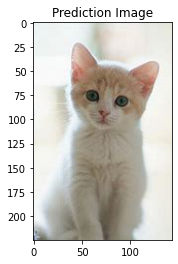

In [36]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open('/content/download.jpg')
plt.title('Prediction Image')
plt.imshow(image)
plt.show()

In [37]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/download.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [38]:
print(prediction)

cat
